In [5]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Since we're creating arrays of lats/lngs, declare each array as a variable

# Create a set of random latitude and longitude combinations
# Pack the lats/lngs as pairs by zipping them with the zip() function

lats = np.random.uniform(-90, 90, size=1500)

lngs = np.random.uniform(-180, 180, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [7]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Import the citipy module to find the nearest cities to our coordinates
from citipy import citipy

In [9]:
# Create a list for holding the citiy names
cities = []

# Identify the nearest city for each lat/lng combination using a for-loop to iterate through the tuple
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

599

In [10]:
# Import requests library and API key
import requests
from config import weather_api_key

In [11]:
# Basic URL for OpenWeatherMap with API key added to end
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city info into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | raudeberg
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | solnechnyy
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | pokhara
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | bokspits
City not found. Skipping...
Processing Record 14 of Set 1 | grindavik
Processing Record 15 of Set 1 | general salgado
Processing Record 16 of Set 1 | strezhevoy
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | quatre cocos
Processing Record 21 of Set 1 | hermanus
Proc

Processing Record 41 of Set 4 | bilibino
Processing Record 42 of Set 4 | pahrump
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | port hardy
Processing Record 45 of Set 4 | arica
Processing Record 46 of Set 4 | bodden town
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | capaci
Processing Record 49 of Set 4 | batticaloa
Processing Record 50 of Set 4 | broome
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | svay rieng
Processing Record 3 of Set 5 | aklavik
Processing Record 4 of Set 5 | kismayo
Processing Record 5 of Set 5 | ketchikan
Processing Record 6 of Set 5 | airai
Processing Record 7 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 8 of Set 5 | skowhegan
Processing Record 9 of Set 5 | coquimbo
Processing Record 10 of Set 5 | flinders
Processing Record 11 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 5 | thompson
Processing Record 13 of Set 5 | nemuro
P

Processing Record 31 of Set 8 | sembabule
Processing Record 32 of Set 8 | puerto madero
Processing Record 33 of Set 8 | camacupa
Processing Record 34 of Set 8 | haines junction
Processing Record 35 of Set 8 | thyboron
Processing Record 36 of Set 8 | coari
Processing Record 37 of Set 8 | miramar
Processing Record 38 of Set 8 | amderma
City not found. Skipping...
Processing Record 39 of Set 8 | utete
Processing Record 40 of Set 8 | frutal
Processing Record 41 of Set 8 | elko
Processing Record 42 of Set 8 | stutterheim
Processing Record 43 of Set 8 | rawah
Processing Record 44 of Set 8 | bage
Processing Record 45 of Set 8 | lorengau
Processing Record 46 of Set 8 | waipawa
Processing Record 47 of Set 8 | ayan
Processing Record 48 of Set 8 | horizontina
Processing Record 49 of Set 8 | shakiso
Processing Record 50 of Set 8 | pierre
Processing Record 1 of Set 9 | ternate
Processing Record 2 of Set 9 | seoul
Processing Record 3 of Set 9 | ambon
Processing Record 4 of Set 9 | jerome
Processing 

Processing Record 18 of Set 12 | inhuma
Processing Record 19 of Set 12 | paka
Processing Record 20 of Set 12 | zarechnyy
Processing Record 21 of Set 12 | kristinehamn
Processing Record 22 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 23 of Set 12 | plettenberg bay
Processing Record 24 of Set 12 | rajsamand
Processing Record 25 of Set 12 | atar
Processing Record 26 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 27 of Set 12 | gorontalo
Processing Record 28 of Set 12 | karonga
Processing Record 29 of Set 12 | penzance
Processing Record 30 of Set 12 | amahai
Processing Record 31 of Set 12 | mastic beach
Processing Record 32 of Set 12 | sao joao da barra
Processing Record 33 of Set 12 | illela
Processing Record 34 of Set 12 | verkhoyansk
Processing Record 35 of Set 12 | ericeira
Processing Record 36 of Set 12 | karasjok
Processing Record 37 of Set 12 | lamu
Processing Record 38 of Set 12 | kasempa
Processing Record 39 of Set 12 | grim

In [16]:
len(city_data)

551

In [17]:
# Convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Raudeberg,61.9875,5.1352,48.87,1,58,19.93,NO,2022-10-02 22:30:20
1,Ushuaia,-54.8000,-68.3000,46.06,53,0,4.61,AR,2022-10-02 22:26:17
2,Kapaa,22.0752,-159.3190,79.20,83,100,17.27,US,2022-10-02 22:30:21
3,Dikson,73.5069,80.5464,30.56,94,100,20.76,RU,2022-10-02 22:30:22
4,Atuona,-9.8000,-139.0333,76.98,75,22,17.07,PF,2022-10-02 22:30:23
5,Klaksvik,62.2266,-6.5890,52.72,90,30,19.75,FO,2022-10-02 22:30:24
6,Carnarvon,-24.8667,113.6333,64.13,62,0,15.55,AU,2022-10-02 22:30:24
7,Solnechnyy,50.7214,136.6319,46.20,98,100,2.71,RU,2022-10-02 22:30:25
8,Jamestown,42.0970,-79.2353,54.99,77,20,10.36,US,2022-10-02 22:25:49
9,Pokhara,28.2333,83.9833,68.59,51,0,6.78,NP,2022-10-02 22:30:27


In [19]:
# Reorder the columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Raudeberg,NO,2022-10-02 22:30:20,61.9875,5.1352,48.87,1,58,19.93
1,Ushuaia,AR,2022-10-02 22:26:17,-54.8000,-68.3000,46.06,53,0,4.61
2,Kapaa,US,2022-10-02 22:30:21,22.0752,-159.3190,79.20,83,100,17.27
3,Dikson,RU,2022-10-02 22:30:22,73.5069,80.5464,30.56,94,100,20.76
4,Atuona,PF,2022-10-02 22:30:23,-9.8000,-139.0333,76.98,75,22,17.07


In [20]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the Dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

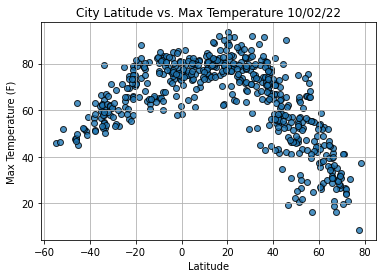

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig1.png")

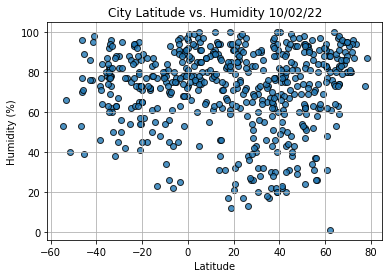

In [30]:
# Build scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("weather_data/Fig2.png")

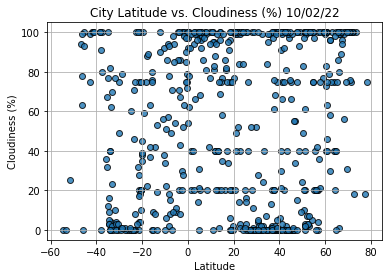

In [31]:
# Build scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("weather_data/Fig3.png")

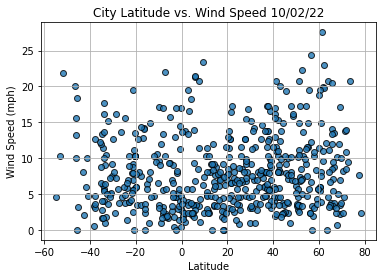

In [32]:
# Build scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("weather_data/Fig4.png")